# COGS 108 - Final Project 

# Overview

The goal of the following project is to investigate the relationship between a park's rating and the number of calls to the police in and around that park for any given park in San Diego, while keeping in mind the average severity of those calls. By using San Diego park geodata, yelp ratings data, along with San Diego crime, police beat, and police neighborhood data I was able to create one large data set that allowed me to answer my question. I found that there was no correlation between number of calls to the police near a park and the rating of that park. The data also showed that the average severity of those calls had no correlation with the rating either.

# Name & GitHub

- Name: Richard Appen
- GitHub Username: RichardAppen

# Research Question

What is the relationship between overall park ratings and number of calls to the police near the parks of San Diego?

## Background and Prior Work

San Diego Parks will always have crime happening around them, but is there any link between this crime and the quality of the parks themselves? Research has shown that living near a park *greatly* increases mental health (1), and that parks create more community engagement (2). Thus, we can infer that poorly maintained parks that people don't want to go to would decrease surrounding mental health and community engagement as less people would be using the park. A broken community with people in a bad mental state is more likely to have more crime. 

Some San Diego parks are liked more than others and just like any public service these parks can be ranked and given ratings by park goers on sites like Yelp. We can analyze these ratings to see which parks are maintained properly and which ones aren't based on how much people enjoy them and how highly people rate them.

A "Police Beat" is a patrol area or territory of a city (5). The City of San Diego is divided into about 125 different police beats. Officers who are assigned to a certain beat, patrol the area/neighborhood that beat is associated with. All calls to the police are associated to a beat number. By determining which beats each park intersects with we can then determine the number of calls to the police happened near that park to gives us an idea of the level of crime.

When the San Diego police are called, they log the police beat where the call took place, the main street the call took place, and the priority of the call. Although counter-intuitive, a low priority number indicates that the call is more severe. For example, a call that has a priority of 0 would mean the call is the most severe and could be about an incident that posed a threat to human life or a very dangerous situation. 

San Diego parks have a long history with crime including multiple murders in multiple different parks within San Diego (3). These "deadly parks" are most likely not maintained, receive small allocations of funding from the overall parks and recreation budget, and thus have low ratings. Research on the role "park design" has on overall safety has shown that parks with the proper investments and that are maintained will attract more visitors and in turn decrease crime in the park and surrounding areas (4). From this we can see that it would be valuable to understand the relationship between park ratings and crime in and around a park. If a lower park rating does predict higher crime in the area, then that is fuel to get legislators to fund these individual parks and get raise them to the standards of higher rated parks. We can take notes from this previous research on how more investment and management of parks leads to less crime and get our park ratings up to help decrease crime levels. With the study of "do parks decrease the number of crimes" being run over and over again with majority of the results indicating that parks do in fact decrease crime (6) is it not a far-fetched assumption that low rated parks are simply less effective as higher rated parks in decreasing crime. 

References (include links):
- 1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4049158/
- 2) https://www.brec.org/assets/General_Info/Why_R_Parks_Important/Papers/Parks-for-Community-Engagement.pdf
- 3) https://www.sandiegoreader.com/news/2020/jun/03/cover-san-diegos-deadliest-parks/
- 4) https://www.pps.org/article/what-role-can-design-play-in-creating-safer-parks
- 5) https://en.wikipedia.org/wiki/Beat_(police)
- 6) https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwikq8rJ0sPtAhVPXK0KHSJhBQsQFjABegQIBRAC&url=https%3A%2F%2Fwww.mdpi.com%2F1660-4601%2F16%2F24%2F5119%2Fpdf&usg=AOvVaw1T0QTgQ-nR8b7tDYtffz56

# Hypothesis


I hypothesize that there will be a negative correlation between park ratings and the number of calls to the police near the parks of San Diego. San Diego parks that are rated highly would be considered "nice" parks that draw more visitors and I believe they won't be found in areas that have higher rates of crime. I would expect to see that a higher rated park would be in an area that has much less calls to the police.

# Dataset(s)

Dataset 1:
- Dataset Name: Park Locations Data (parks_datasd.geojson)
- Link to the dataset: https://data.sandiego.gov/datasets/park-locations/
- Number of observations: 2,769
This dataset provides geodata of all parks in San Diego. The important pieces that it gives me are each park's name and alias as well as it's geographic location in San Diego using geopandas objects.


Dataset 2:
- Dataset Name: Yelp Data for San Diego Parks (yelp_SD_parks.csv)
- Link to the dataset: Curated and given by Professor Ellis.
- Number of observations: 833
This dataset provides the yelp rating of most parks in San Diego, as well as the name of the park the rating belongs to. It also provides the latitude and longitude of the parks the rating belongs to, which will prove very helpful in connecting a yelp rating with the park it's meant for.


Dataset 3:
- Dataset Name: Police Calls for Service [2020] (pd_calls_for_service_2020_datasd.csv)
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 522,569
This dataset outlines all police calls in San Diego for the year 2020. It gives the main street the incident was on and also the police beat that responded. It also gives the priority of the call, where a smaller priority means the call was more important or serious (more life threatening).


Dataset 4:
- Dataset Name: Police Neighborhoods (pd_neighborhoods_datasd.geojson)
- Link to the dataset: https://data.sandiego.gov/datasets/pd-neighborhoods/
- Number of observations: 124
This dataset gives all of neighborhoods of San Diego corresponding geopandas polygon object, so we can plot each neighborhood on a map. Each neighborhood has a corresponding police Beat number. 


Dataset 5:
- Dataset Name: Police Beats (pd_beat_codes_list_datasd.csv)
- Link to the dataset: https://data.sandiego.gov/datasets/police-beats/
- Number of observations: 125
This dataset tells what the police beat number is for each one of the above San Diegan neighborhoods.


I will combine these datasets in the following way. First will merge the Police Beats dataset into the Police Neighborhoods dataset. Both contain ~124 San Diegan neighborhoods while the first contains each neighborhood’s beat number and the later contains each neighborhoods geodata. I will match the neighborhood names to get a dataset that contains both the geodata and the beat number of each neighborhood in San Diego. Then I will merge this into the San Diego Park Locations data by going through each park and determining which neighborhoods it intersects with on a map (using the geodata in both data frames). I will then associate that neighborhood's police beat number with that park (there could be multiple beat numbers for one park if that park intersects with multiple neighborhoods). From here I merge the yelp data into the Park Locations data frame. I can turn the latitude and longitude of each yelp data into a geopandas object and see if they fall within the geographic polygons of any parks in the Parks Locations data frame. If a yelp rating does then I associate it with that park. Finally, I use police beat numbers to determine how many calls in the Police Calls for Service data frame were in the area of that park, and what the priority of those calls were on average.

# Setup

In [ ]:
%pip install geopandas --user

In [ ]:
%pip install descartes --user

In [1]:
# Imports

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import descartes

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

### 1. Data Loading

In [2]:
df_parks = geopandas.read_file("parks_datasd.geojson")

In [3]:
df_yelp = pd.read_csv("yelp_SD_parks.csv")

In [4]:
df_crime = pd.read_csv("pd_calls_for_service_2020_datasd.csv")

In [5]:
df_neigh = geopandas.read_file("pd_neighborhoods_datasd.geojson")

In [6]:
df_beat = pd.read_csv("pd_beat_codes_list_datasd.csv")

### 2. Data Trimming

In [7]:
df_yelp = df_yelp.drop(["phone", "id", "url", "is_closed"], axis=1)

In [8]:
df_parks = df_parks.drop(["park_type", "location", "owner", "objectid"], axis=1)

### 3. Data Merging -> Into one big dataframe

As mentioned earlier police beats are the different patrol areas of the police in a City. They let us know where the officers who responded were coming from. So a police beat of XXX would indicate that the incident happened in XXX's neighborhood as every single police beat corresponds to a certain neighborhood of San Diego

First add a beat column to df_neigh. df_neigh shows all neighborhoods and contains geodata of the neighborhoods locations, we are just appending each neighborhoods corresponding beat number to the geopandas data frame.

In [9]:
df_neigh["beat"] = 0

In [10]:
df_neigh["name"] = df_neigh["name"].str.upper()

In [11]:
df_beat["neighborhood"] = df_beat["neighborhood"].str.upper()

In [12]:
df_beat["used"] = False

Match the names in df_beat to the names in df_neigh to get beats within the neighborhood geodata.

In [13]:
for index_neigh, row_neigh in df_neigh.iterrows():
    for index_beat, row_beat in df_beat.iterrows():
        
        # If they have the same neighborhood name, then associate that beat with that neighborhood in df_neigh
        if (row_neigh["name"] == row_beat["neighborhood"]):
            row_neigh["beat"] = row_beat["beat"]
            df_neigh.at[index_neigh, "beat"] = row_neigh["beat"]
            
            # Mark off which beats have been associated with a neighborhood in df_neigh
            df_beat.at[index_beat, "used"] = True
            break
            

These are the few values that didn't get a match, must be a naming inconsistency. Let's check it out:

In [14]:
df_neigh[df_neigh["beat"] == 0]

,objectid,name,geometry,beat
2,3,MISSION BAY,"POLYGON ((-117.25457 32.75655, -117.25369 32.7...",0
12,13,MT HOPE,"POLYGON ((-117.09712 32.70771, -117.09778 32.7...",0
24,25,ROSEVILLE / FLEET RIDGE,"POLYGON ((-117.21968 32.73581, -117.22067 32.7...",0
33,34,REDWOOD VILLAGE/ROLANDO PARK,"POLYGON ((-117.04913 32.75519, -117.04990 32.7...",0
60,61,FAIRMONT VILLAGE,"POLYGON ((-117.09228 32.74954, -117.09281 32.7...",0
107,108,JAMACHA LOMITA,"POLYGON ((-117.02069 32.70753, -117.02069 32.7...",0
116,117,FAIRMONT PARK,"POLYGON ((-117.10334 32.72556, -117.10374 32.7...",0


Let's see if some of the names in the beat data frame weren't used.

In [15]:
df_beat[df_beat["used"] == False]

,beat,neighborhood,used
37,434,JAMACHA/LOMITA,False
46,444,MT. HOPE,False
51,452,O'FARRELL,False
74,615,ROSEVILLE/FLEET RIDGE,False
101,823,REDWOOD VILLAGE,False
110,833,FAIRMOUNT VILLAGE,False
114,837,FAIRMOUNT PARK,False
117,841,ROLANDO PARK,False


We can see some values didn't get matched because of random syntax differences so we can do those manually:

In [16]:
df_neigh.loc[df_neigh['name'] == 'MT HOPE', 'beat'] = 444
df_beat.loc[df_beat['neighborhood'] == 'MT. HOPE', 'used'] = True
df_neigh.loc[df_neigh['name'] == 'ROSEVILLE / FLEET RIDGE', 'beat'] = 615
df_beat.loc[df_beat['neighborhood'] == 'ROSEVILLE/FLEET RIDGE', 'used'] = True
df_neigh.loc[df_neigh['name'] == 'FAIRMONT VILLAGE', 'beat'] = 833
df_beat.loc[df_beat['neighborhood'] == 'FAIRMOUNT VILLAGE', 'used'] = True
df_neigh.loc[df_neigh['name'] == 'JAMACHA LOMITA', 'beat'] = 434
df_beat.loc[df_beat['neighborhood'] == 'JAMACHA/LOMITA', 'used'] = True
df_neigh.loc[df_neigh['name'] == 'FAIRMONT PARK', 'beat'] = 837
df_beat.loc[df_beat['neighborhood'] == 'FAIRMOUNT PARK', 'used'] = True

Now check again:

In [17]:
df_neigh[df_neigh["beat"] == 0]


,objectid,name,geometry,beat
2,3,MISSION BAY,"POLYGON ((-117.25457 32.75655, -117.25369 32.7...",0
33,34,REDWOOD VILLAGE/ROLANDO PARK,"POLYGON ((-117.04913 32.75519, -117.04990 32.7...",0


In [18]:
df_beat[df_beat["used"] == False]

,beat,neighborhood,used
51,452,O'FARRELL,False
101,823,REDWOOD VILLAGE,False
117,841,ROLANDO PARK,False


We can see one geographic location actually has two beats. We will make sure to add this extra beat into the REDWOORD VILLAGE/ROLAND PARK park data later when adding multiple beats is easier. For now let’s just give it the first beat:

In [19]:
df_neigh.loc[df_neigh['name'] == 'REDWOOD VILLAGE/ROLANDO PARK', 'beat'] = 823
df_beat.loc[df_beat['neighborhood'] == 'REDWOOD VILLAGE', 'used'] = True

In [20]:
df_neigh

,objectid,name,geometry,beat
0,1,MIRAMAR RANCH NORTH,"POLYGON ((-117.10580 32.94798, -117.10584 32.9...",246
1,2,TORREY HIGHLANDS,"POLYGON ((-117.16982 32.95572, -117.16952 32.9...",936
2,3,MISSION BAY,"POLYGON ((-117.25457 32.75655, -117.25369 32.7...",0
3,4,NORTH CITY,"POLYGON ((-117.17457 32.97018, -117.17473 32.9...",935
4,5,LOMA PORTAL,"POLYGON ((-117.21776 32.74949, -117.21777 32.7...",612
...,...,...,...,...
119,120,CLAIREMONT MESA WEST,"POLYGON ((-117.17366 32.80142, -117.17378 32.8...",112
120,121,BIRDLAND,"POLYGON ((-117.15377 32.78024, -117.15376 32.7...",314
121,122,MIRAMAR,"POLYGON ((-117.11631 32.90026, -117.11631 32.9...",243
122,123,KEARNY MESA,"POLYGON ((-117.12798 32.84169, -117.12999 32.8...",313


Now we have to merge these beats into the overall San Diego Parks geodata. We want to associate each park with one or more police beats. Since we have each police beat attached to some geodata in the df_neigh data frame we can use geopandas intersection function and determine which neighborhoods each park intersects with. Based on this we can list out the beats associated with each and every park.

In [21]:
df_parks["beat"] = np.empty((len(df_parks), 0)).tolist()     # Initialize each entry to an empty list

In [22]:
df_parks["number_of_beats"] = 0         # Keep track of how many beats are in each park's beat list

In [23]:
for index_parks, row_parks in df_parks.iterrows():
    for index_neigh, row_neigh in df_neigh.iterrows():
        
        # See what San Diegan neighborhoods each park intersects with.
        if row_parks['geometry'].intersects(row_neigh['geometry']):
            
            # Deal with the special REDWOOD VILLAGE/ROLANDO PARK case of having two beats
            # We know it's objectid is 33 so when we find it make sure to add the additional beat
            if (index_neigh == 33):
                df_parks.loc[index_parks, "number_of_beats"] = df_parks.loc[index_parks, "number_of_beats"] + 1
                df_parks.loc[index_parks, "beat"].append(841)
        
            
            # If we intersect then add the beat of the curren't neighborhood to the list of beats for the current park
            df_parks.loc[index_parks, "number_of_beats"] = df_parks.loc[index_parks, "number_of_beats"] + 1
            df_parks.loc[index_parks, "beat"].append(row_neigh["beat"])

Now that "most" parks have 1 or more police beats associated to it we can try to attach yelp ratings to each park. We can do it the same way since yelp gives the longitude and latitude of the parks that were rated. By turning these coordinates into geopandas POINT objects we can check to see if the point is in any of our given park geodata.

In [24]:
# Turn df_yelp into a geopandas dataframe using it longitude and latitude columns
df_yelp_geo = geopandas.GeoDataFrame(
    df_yelp, geometry=geopandas.points_from_xy(df_yelp.longitude, df_yelp.latitude))

In [25]:
df_parks["rating"] = np.empty((len(df_parks), 0)).tolist()      # Initialize ratings column to have empty list
df_parks["number_yelp_sources"] = 0    # Keep track of how many different overall ratings get associated to each park
df_yelp_geo["used"] = False            # Keep track of which geodata we use
df_parks["number_of_ratings"] = 0      # Keep track of how many user's review the park, contributing to the overall rating

For each yelp review determine the point on the map that its park is linked to. Then check each park in our main park data frame to see if the point is 'within' that park's geodata. If it is, we can associate that review with it:

In [26]:
for index_yelp_geo, row_yelp_geo in df_yelp_geo.iterrows():
    for index_parks, row_parks in df_parks.iterrows():
        
        # If the geo point the yelp rating corresponds to is within the polygon of the current rark:
        if row_yelp_geo['geometry'].within(row_parks["geometry"]):
            
            
            # then we add that rating to this park in the park dataframe and make sure to mark this yelp rating as used
            df_parks.loc[index_parks, "rating"].append(row_yelp_geo["rating"])
            df_parks.loc[index_parks, "number_yelp_sources"] = df_parks.loc[index_parks, "number_yelp_sources"] + 1
            df_yelp.loc[index_yelp_geo, "used"] = True
            
            # We also want to keep track of total number of ratings
            df_parks.loc[index_parks, "number_of_ratings"] = df_parks.loc[index_parks, "number_of_ratings"] + row_yelp_geo["review_count"]

Some of the yelp coordinates were slightly off so we can add a couple data points that were missed using name matching:

In [27]:
df_parks["alias"] = df_parks["alias"].str.upper()

In [28]:
df_parks["name"] = df_parks["name"].str.upper()

In [29]:
df_yelp["name"] = df_yelp["name"].str.upper()

In [30]:
for index_parks, row_parks in df_parks.iterrows():
    for index_yelp, row_yelp in df_yelp.iterrows():
        
        # If the name or alias of the park matches the yelp review's park name:
        if (row_parks['alias'] == row_yelp["name"] or row_parks['name'] == row_yelp["name"]):
            
            
            # Then we check to see if we have already matched any reviews to this current park:
            if (row_parks["number_yelp_sources"] == 0):
                
                # If we haven't then we know we can add this review in and it won't be a duplicate
                df_parks.loc[index_parks, "rating"].append(row_yelp["rating"])
                df_parks.loc[index_parks, "number_yelp_sources"] = df_parks.loc[index_parks, "number_yelp_sources"] + 1
                df_yelp.loc[index_yelp, "used"] = True
                df_parks.loc[index_parks, "number_of_ratings"] = df_parks.loc[index_parks, "number_of_ratings"] + row_yelp["review_count"]

In [31]:
df_parks[df_parks["number_yelp_sources"] != 0]

,name,alias,gis_acres,geometry,beat,number_of_beats,rating,number_yelp_sources,number_of_ratings
1,TORREY PINES SB,TORREY PINES STATE BEACH,67.294309,"POLYGON ((-117.26147 32.93883, -117.26181 32.9...","[126, 932]",2,[4.5],1,14
2,RUOCCO PARK,RUOCCO PARK,3.312526,"POLYGON ((-117.17298 32.71167, -117.17303 32.7...",[522],1,[4.0],1,18
15,BORDER FIELD SP,BORDER FIELD STATE PARK,787.553806,"MULTIPOLYGON (((-117.11285 32.55096, -117.1159...",[711],1,[4.0],1,53
16,CUYAMACA RANCHO SP,CUYAMACA RANCHO STATE PARK,24737.005797,"MULTIPOLYGON (((-116.58028 32.97747, -116.5808...",[],0,[4.5],1,86
18,OLD TOWN SAN DIEGO SHP,OLD TOWN SAN DIEGO STATE PARK,32.386581,"MULTIPOLYGON (((-117.19904 32.75595, -117.1990...","[625, 611]",2,"[4.0, 4.0]",2,562
...,...,...,...,...,...,...,...,...,...
2727,4S RANCH COMMUNITY PARK,4S RANCH COMMUNITY PARK,3.241830,"POLYGON ((-117.11610 33.00321, -117.11583 33.0...",[],0,[5.0],1,17
2731,LAKESIDE COMMUNITY CENTER,LAKESIDE COMMUNITY CENTER,1.719980,"POLYGON ((-116.92062 32.85854, -116.92023 32.8...",[],0,[4.5],1,8
2741,OTAY VALLEY REGIONAL PARK,OTAY VALLEY REGIONAL PARK,4527.461761,"MULTIPOLYGON (((-116.94147 32.62895, -116.9416...","[725, 713, 724, 723]",4,[4.5],1,21
2746,LOS PENASQUITOS PRESERVE,LOS PENASQUITOS CANYON COUNTY PRESERVE,117.393671,"POLYGON ((-117.12750 32.93661, -117.12705 32.9...","[242, 233]",2,[4.0],1,352


Now we have 267 of our parks in the main data frame associated with at least one rating. We only want data of parks that are associated to at least one police beat AND associated to at least one rating so we can actually see any correlation between the two variables:

In [32]:
df_temp = df_parks[df_parks["number_yelp_sources"] != 0]
df_final = df_temp[df_temp["number_of_beats"] != 0]
df_final

,name,alias,gis_acres,geometry,beat,number_of_beats,rating,number_yelp_sources,number_of_ratings
1,TORREY PINES SB,TORREY PINES STATE BEACH,67.294309,"POLYGON ((-117.26147 32.93883, -117.26181 32.9...","[126, 932]",2,[4.5],1,14
2,RUOCCO PARK,RUOCCO PARK,3.312526,"POLYGON ((-117.17298 32.71167, -117.17303 32.7...",[522],1,[4.0],1,18
15,BORDER FIELD SP,BORDER FIELD STATE PARK,787.553806,"MULTIPOLYGON (((-117.11285 32.55096, -117.1159...",[711],1,[4.0],1,53
18,OLD TOWN SAN DIEGO SHP,OLD TOWN SAN DIEGO STATE PARK,32.386581,"MULTIPOLYGON (((-117.19904 32.75595, -117.1990...","[625, 611]",2,"[4.0, 4.0]",2,562
21,TORREY PINES SNR,TORREY PINES STATE NATURE RESERVE,1466.798603,"MULTIPOLYGON (((-117.25092 32.93199, -117.2534...","[126, 932, 933]",3,"[4.5, 4.5, 5.0]",3,1335
...,...,...,...,...,...,...,...,...,...
2701,TIJUANA RIVER VALLEY PARK,TIJUANA RIVER VALLEY REGIONAL PARK,1778.826476,"MULTIPOLYGON (((-117.09285 32.55777, -117.0928...","[721, 711, 712, 722]",4,"[4.5, 4.5]",2,314
2719,WATERFRONT PARK,WATERFRONT PARK,12.693865,"POLYGON ((-117.17156 32.72450, -117.17280 32.7...",[527],1,[4.5],1,242
2741,OTAY VALLEY REGIONAL PARK,OTAY VALLEY REGIONAL PARK,4527.461761,"MULTIPOLYGON (((-116.94147 32.62895, -116.9416...","[725, 713, 724, 723]",4,[4.5],1,21
2746,LOS PENASQUITOS PRESERVE,LOS PENASQUITOS CANYON COUNTY PRESERVE,117.393671,"POLYGON ((-117.12750 32.93661, -117.12705 32.9...","[242, 233]",2,[4.0],1,352


Now we have 210 parks to work with. Not Bad!

Now it is possible some yelp reviews for certain parks where actually about a subset of a larger park. This is why in our overall park data, ratings are in a list and there is possibly more than 1 rating associated to every park. For example, let's say a large park X has a baseball league that is rated separately to the actual park, so X should have two ratings, it's baseball league's rating and it's main rating. 

We will take the average of multiple ratings to get an overall rating for each park:

In [33]:
df_final["overall_rating"] = 0

In [34]:
for index_final, row_final in df_final.iterrows():
    currList = row_final["rating"]
    df_final.loc[index_final, "overall_rating"] = sum(currList)/len(currList)

In [35]:
df_final

,name,alias,gis_acres,geometry,beat,number_of_beats,rating,number_yelp_sources,number_of_ratings,overall_rating
1,TORREY PINES SB,TORREY PINES STATE BEACH,67.294309,"POLYGON ((-117.26147 32.93883, -117.26181 32.9...","[126, 932]",2,[4.5],1,14,4.500000
2,RUOCCO PARK,RUOCCO PARK,3.312526,"POLYGON ((-117.17298 32.71167, -117.17303 32.7...",[522],1,[4.0],1,18,4.000000
15,BORDER FIELD SP,BORDER FIELD STATE PARK,787.553806,"MULTIPOLYGON (((-117.11285 32.55096, -117.1159...",[711],1,[4.0],1,53,4.000000
18,OLD TOWN SAN DIEGO SHP,OLD TOWN SAN DIEGO STATE PARK,32.386581,"MULTIPOLYGON (((-117.19904 32.75595, -117.1990...","[625, 611]",2,"[4.0, 4.0]",2,562,4.000000
21,TORREY PINES SNR,TORREY PINES STATE NATURE RESERVE,1466.798603,"MULTIPOLYGON (((-117.25092 32.93199, -117.2534...","[126, 932, 933]",3,"[4.5, 4.5, 5.0]",3,1335,4.666667
...,...,...,...,...,...,...,...,...,...,...
2701,TIJUANA RIVER VALLEY PARK,TIJUANA RIVER VALLEY REGIONAL PARK,1778.826476,"MULTIPOLYGON (((-117.09285 32.55777, -117.0928...","[721, 711, 712, 722]",4,"[4.5, 4.5]",2,314,4.500000
2719,WATERFRONT PARK,WATERFRONT PARK,12.693865,"POLYGON ((-117.17156 32.72450, -117.17280 32.7...",[527],1,[4.5],1,242,4.500000
2741,OTAY VALLEY REGIONAL PARK,OTAY VALLEY REGIONAL PARK,4527.461761,"MULTIPOLYGON (((-116.94147 32.62895, -116.9416...","[725, 713, 724, 723]",4,[4.5],1,21,4.500000
2746,LOS PENASQUITOS PRESERVE,LOS PENASQUITOS CANYON COUNTY PRESERVE,117.393671,"POLYGON ((-117.12750 32.93661, -117.12705 32.9...","[242, 233]",2,[4.0],1,352,4.000000


To move forward we want to see actual crime statistics in areas with each park. Using the police beats associated with each park we can check out our crime data frame and see how many police calls occurred, and the severity of each within the jurisdiction of each police beat. We will get the total number of calls by adding up all calls in each police beat associated with the current park. Then we will take the average of all their priorities to help determine on average how severe each call in the area was:

In [36]:
df_final["number_of_calls"] = 0
df_final["average_priority"] = 0

In [37]:
df_beat["numCalls"] = 0
df_beat["totalPriority"] = 0
dictBeats = {}
dictPriority = {}

# Initialize 1 dict to hold all calls for any given beat, and 1 dict to hold all priorities for any given beat
for index_beats, row_beats in df_beat.iterrows():
    dictBeats[row_beats["beat"]] = 0
    dictPriority[row_beats["beat"]] = 0
    
# As we go through the calls to police in 2020 add up the calls and priorities given the beat for each call
for index_crime, row_crime in df_crime.iterrows():
    dictBeats[row_crime["beat"]] = dictBeats.get(row_crime["beat"], 0) + 1
    dictPriority[row_crime["beat"]] = dictPriority.get(row_crime["beat"], 0) + row_crime["priority"]

In [38]:
# Now add up all these calls and priorities for any given park that has 1 or more beats
for index_final, row_final in df_final.iterrows():
    currBeats = row_final["beat"]
    numCalls = 0
    totalPriority = 0
    for beat in currBeats:
        
        # For each beat in each park's beat list, get its number of calls or total priority using the two dictionaries
        numCalls = dictBeats[beat]
        totalPriority = dictPriority[beat]
    df_final.loc[index_final, "number_of_calls"] = numCalls
    df_final.loc[index_final, "average_priority"] = totalPriority / numCalls

In [39]:
# We no longer need the alias column
df_final = df_final.drop(["alias"], axis=1)

In [40]:
df_final

,name,gis_acres,geometry,beat,number_of_beats,rating,number_yelp_sources,number_of_ratings,overall_rating,number_of_calls,average_priority
1,TORREY PINES SB,67.294309,"POLYGON ((-117.26147 32.93883, -117.26181 32.9...","[126, 932]",2,[4.5],1,14,4.500000,871,2.486797
2,RUOCCO PARK,3.312526,"POLYGON ((-117.17298 32.71167, -117.17303 32.7...",[522],1,[4.0],1,18,4.000000,8334,2.341253
15,BORDER FIELD SP,787.553806,"MULTIPOLYGON (((-117.11285 32.55096, -117.1159...",[711],1,[4.0],1,53,4.000000,65,1.861538
18,OLD TOWN SAN DIEGO SHP,32.386581,"MULTIPOLYGON (((-117.19904 32.75595, -117.1990...","[625, 611]",2,"[4.0, 4.0]",2,562,4.000000,15001,2.196520
21,TORREY PINES SNR,1466.798603,"MULTIPOLYGON (((-117.25092 32.93199, -117.2534...","[126, 932, 933]",3,"[4.5, 4.5, 5.0]",3,1335,4.666667,1922,2.378252
...,...,...,...,...,...,...,...,...,...,...,...
2701,TIJUANA RIVER VALLEY PARK,1778.826476,"MULTIPOLYGON (((-117.09285 32.55777, -117.0928...","[721, 711, 712, 722]",4,"[4.5, 4.5]",2,314,4.500000,3074,2.041314
2719,WATERFRONT PARK,12.693865,"POLYGON ((-117.17156 32.72450, -117.17280 32.7...",[527],1,[4.5],1,242,4.500000,1731,2.079723
2741,OTAY VALLEY REGIONAL PARK,4527.461761,"MULTIPOLYGON (((-116.94147 32.62895, -116.9416...","[725, 713, 724, 723]",4,[4.5],1,21,4.500000,7653,2.266431
2746,LOS PENASQUITOS PRESERVE,117.393671,"POLYGON ((-117.12750 32.93661, -117.12705 32.9...","[242, 233]",2,[4.0],1,352,4.000000,5008,2.378395


# Data Analysis & Results

### 1. First Look

Before we visualize let's get a feel for the data

In [41]:
df_final.describe()

,gis_acres,number_of_beats,number_yelp_sources,number_of_ratings,overall_rating,number_of_calls,average_priority
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,122.517133,1.228571,1.300000,121.500000,4.039698,5328.800000,2.277035
std,501.306605,0.667168,2.035686,692.658827,0.593631,4146.733024,0.132497
min,0.078687,1.000000,1.000000,1.000000,1.000000,65.000000,1.861538
25%,4.531085,1.000000,1.000000,7.000000,4.000000,1967.750000,2.197933
50%,9.317868,1.000000,1.000000,19.000000,4.000000,5008.000000,2.289090
75%,32.366115,1.000000,1.000000,48.000000,4.500000,8334.000000,2.378395
max,4527.461761,7.000000,24.000000,9423.000000,5.000000,22153.000000,2.550014


We can see number of police calls ranges from 65 to 22,000 so clearly some parks are in areas that receive far more calls than other. Let take a look at relative correlation values and get an idea if there are any relationships:

In [42]:
corrs = df_final.corr()
corrs

,gis_acres,number_of_beats,number_yelp_sources,number_of_ratings,overall_rating,number_of_calls,average_priority
gis_acres,1.000000,0.711811,0.455623,0.327947,0.086669,-0.082720,-0.122621
number_of_beats,0.711811,1.000000,0.562265,0.391560,0.112122,-0.097164,-0.084386
number_yelp_sources,0.455623,0.562265,1.000000,0.895014,0.034298,-0.032869,-0.106359
number_of_ratings,0.327947,0.391560,0.895014,1.000000,0.063771,-0.047779,-0.072462
overall_rating,0.086669,0.112122,0.034298,0.063771,1.000000,-0.029271,0.013685
number_of_calls,-0.082720,-0.097164,-0.032869,-0.047779,-0.029271,1.000000,0.175167
average_priority,-0.122621,-0.084386,-0.106359,-0.072462,0.013685,0.175167,1.000000


Sadly, there doesn't seem to be any relationship between the number of police calls and anything else. Same goes for the average priority of these police calls. Although this leads me to believe there may be no correlation let's try and visualize the data on a map, maybe we can see more.

### 2. Map Visualizations

First let's take a look at the overall rating of each park compared to the number of police calls they get in that area.

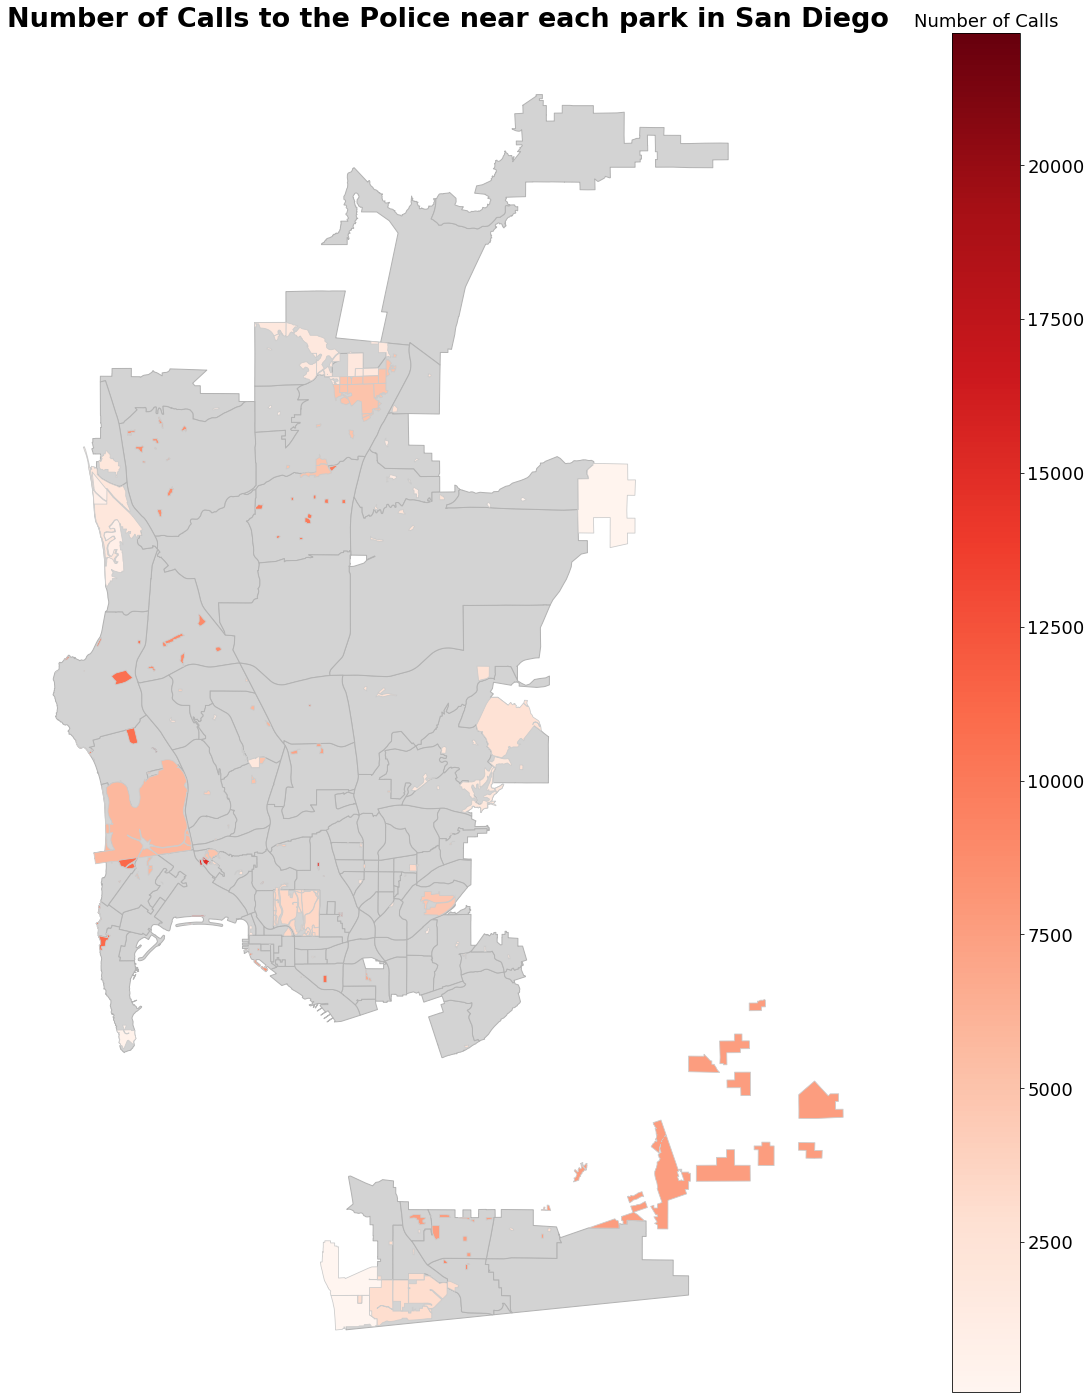

In [43]:
ax = df_neigh.plot(color='lightgray', figsize=(25,25), edgecolor='0.7')
df_final.plot(column='number_of_calls', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.axis('off')
ax.set_title("Number of Calls to the Police near each park in San Diego", weight='bold', fontdict={'fontsize': 27})

fig = ax.figure
cb_ax = fig.axes[1] 
cb_ax.set_title('Number of Calls', fontdict={'fontsize': 18})
cb_ax.tick_params(labelsize=18)

As we would somewhat expect you can see many of the parks with the darkest colors are located in the most populated areas of San Diego. The darkest parks are in PB and La Jolla, densely populated areas near the water. The locations of the parks with smaller amounts of calls to the police seem to be distributed randomly.

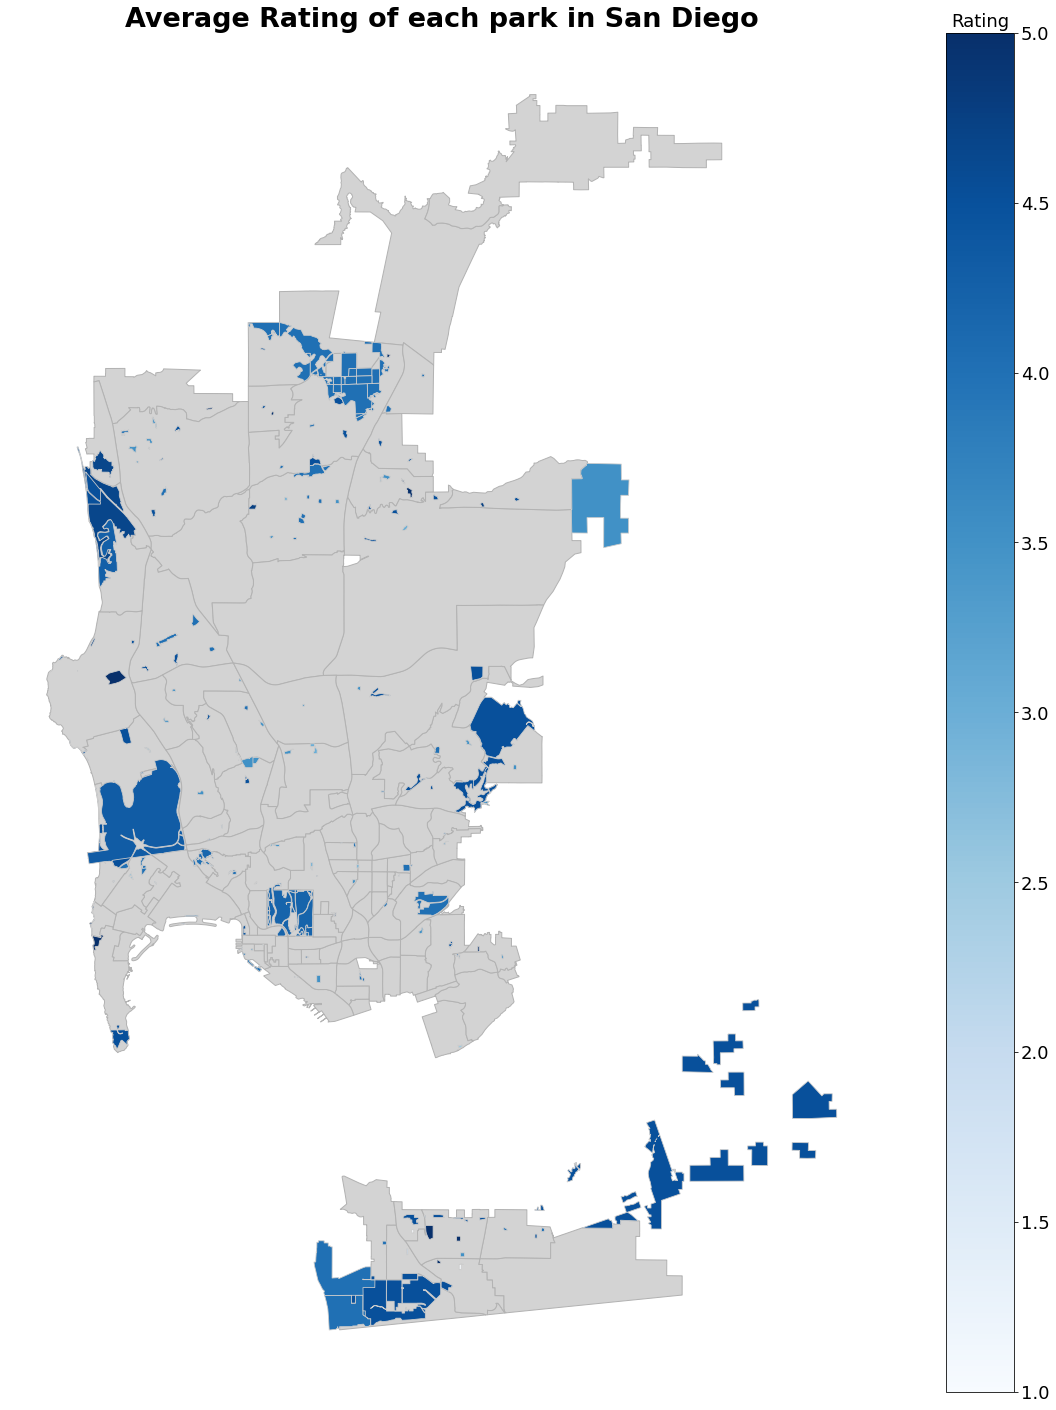

In [44]:
ax = df_neigh.plot(color='lightgray', figsize=(25,25), edgecolor='0.7')
df_final.plot(column='overall_rating', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.axis('off')
ax.set_title("Average Rating of each park in San Diego", weight='bold', fontdict={'fontsize': 27})

fig = ax.figure
cb_ax = fig.axes[1] 
cb_ax.set_title('Rating', fontdict={'fontsize': 18})
cb_ax.tick_params(labelsize=18)

Although the ratings seem to be pretty high on average there isn't much of a pattern between where the higher rated parks are located. There are some highly rated parks in densely populated areas, but also some in not so densely populated areas. When you try to find overlap between this map and the last it is very difficult. The following map is the previous map super imposed on top of the map before it. This helps show if there is any relationship between park rating and the number of calls to police near each park. You can see the dark mixed colors mean it has both a high rating and a larger number of calls:

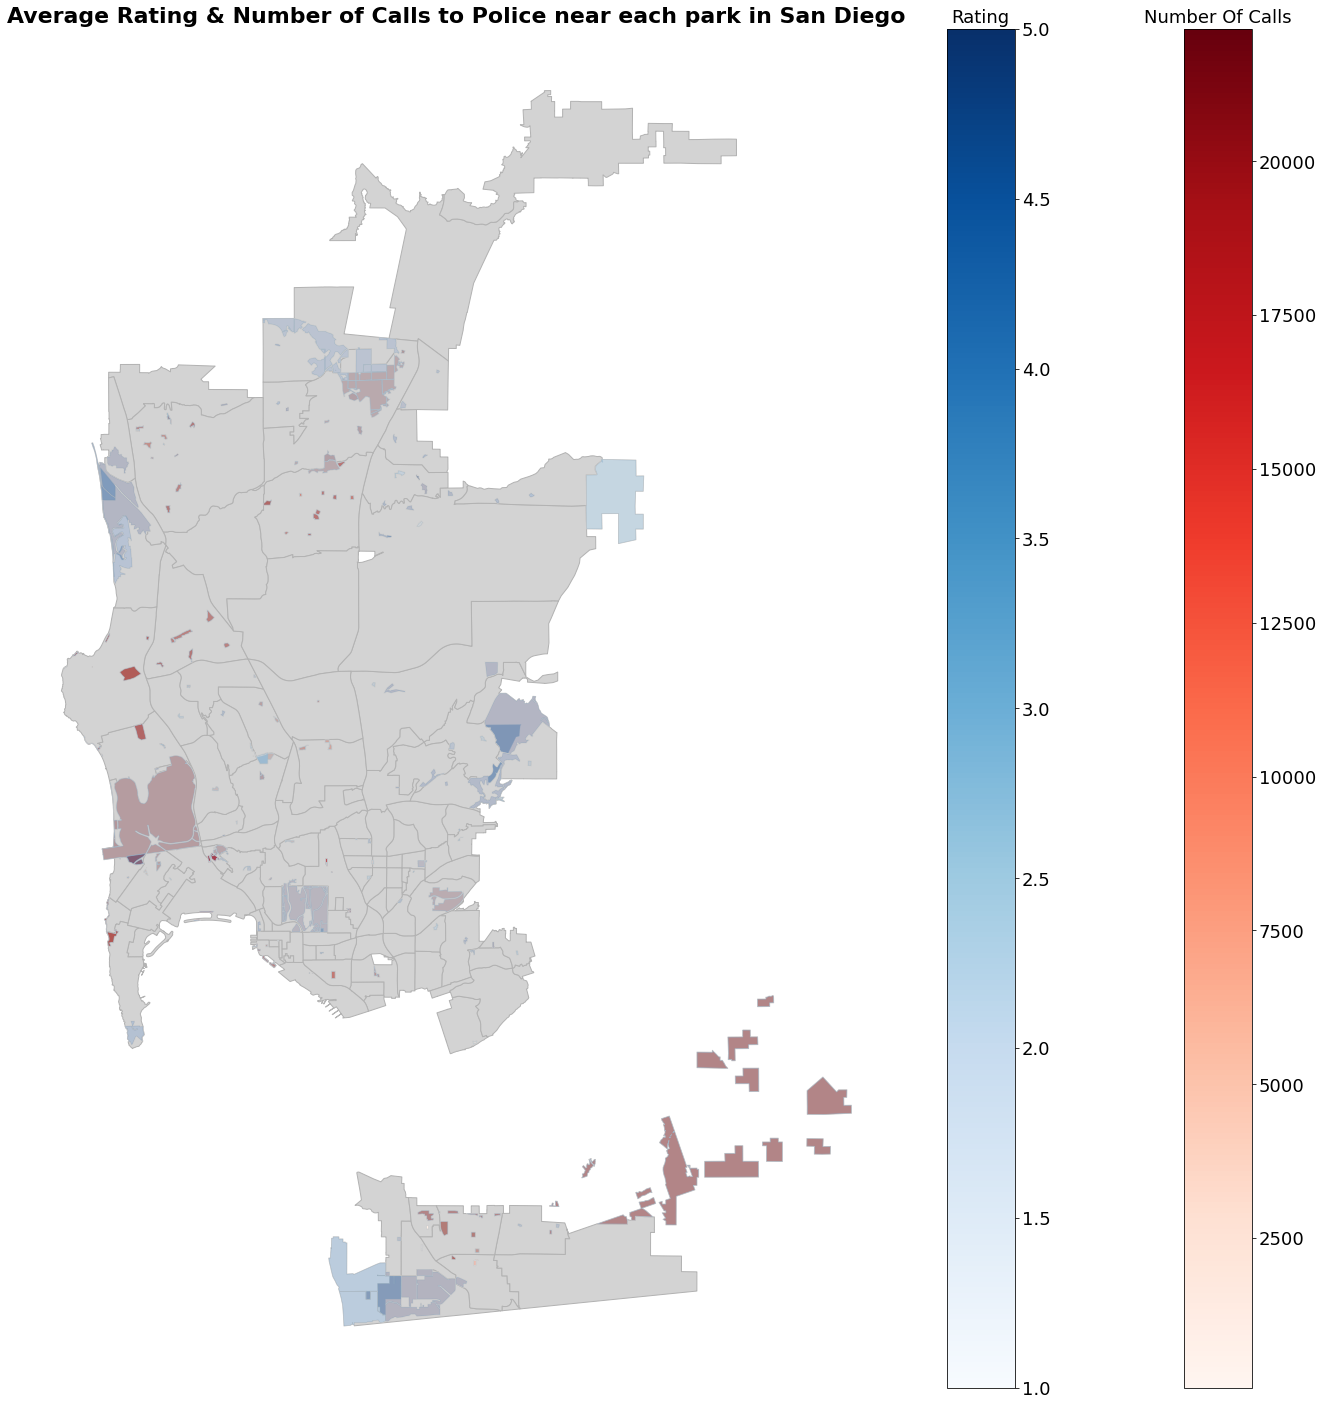

In [45]:
ax = df_neigh.plot(color='lightgray', figsize=(25,25), edgecolor='0.7')
ax2 = df_final.plot(column='number_of_calls', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, alpha=1.0)

df_final.plot(column='overall_rating', cmap='Blues', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True, alpha=0.3)

ax.axis('off')
ax.set_title("Average Rating & Number of Calls to Police near each park in San Diego", weight='bold', fontdict={'fontsize': 22})

fig = ax.figure
cb_ax = fig.axes[1] 
cb_ax.set_title('Number Of Calls', fontdict={'fontsize': 18})
cb_ax.tick_params(labelsize=18)

fig = ax2.figure
cb_ax = fig.axes[2] 
cb_ax.set_title('Rating', fontdict={'fontsize': 18})
cb_ax.tick_params(labelsize=18)


Seeing it on the map, although interesting, doesn't seem to yield any meaningful results, let’s try looking at everything together:

### 3. Regular Visualizations

Text(0.075, 0.95, 'A lower call priority indicates a more severe (more life-threatening or dangerous) call')

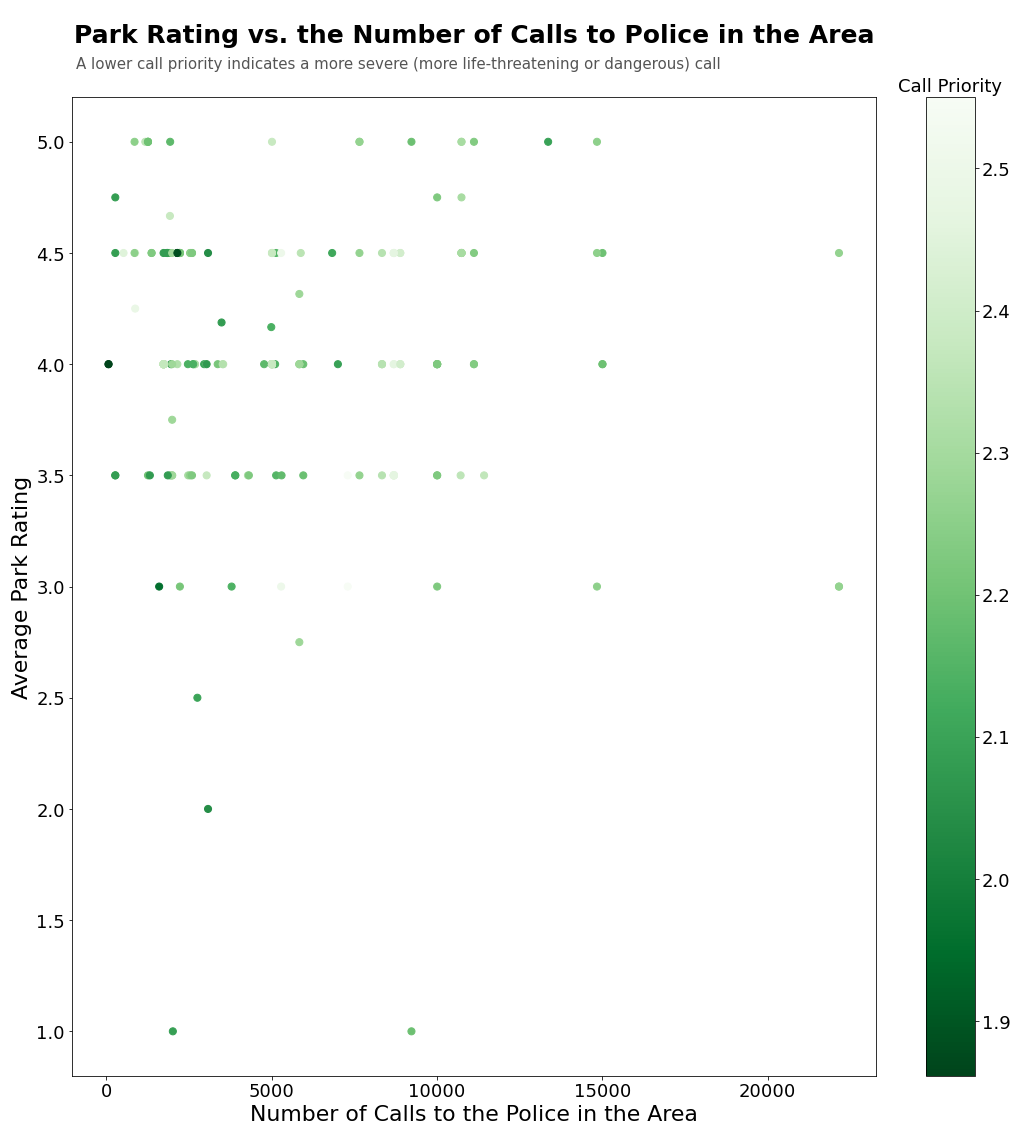

In [46]:
#s = [n for n in range(len(df_2["average_priority"]))]
fig = plt.figure(figsize=(18,18))
sc = plt.scatter(df_final['number_of_calls'], df_final['overall_rating'], c=df_final["average_priority"], s=50, cmap='Greens_r')

plt.colorbar(sc)
plt.title("Park Rating vs. the Number of Calls to Police in the Area", fontsize=25, weight='bold', y=1.05)
plt.xlabel("Number of Calls to the Police in the Area", fontsize=22)
plt.ylabel("Average Park Rating", fontsize=22)
plt.tick_params(labelsize=18)

cb_ax = fig.axes[1] 
cb_ax.set_title('Call Priority', fontdict={'fontsize': 18})
cb_ax.tick_params(labelsize=18)

plt.annotate("A lower call priority indicates a more severe (more life-threatening or dangerous) call",xy=(0.075, .95),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=15, color='#555555')

Here is a scatter plot where each point represents a park. The Y-axis is showing the rating of that park while the X-axis shows how many police calls in that area. The color of each dot (park) indicates how severe on average the police calls where. Now, by definition of the dataset, a lower call priority indicates a more severe call as in it is more dangerous or life threatening. This means lower priority calls are more serious so in this scatter plot I made a lower average priority a darker color to indicate that it is more severe.

### 4. Testing Normality & Outliers

In [47]:
h_call = df_final["number_of_calls"].values

In [48]:
st_call = normaltest(h_call)[0]
p_call = normaltest(h_call)[1] 
print(st_call)
print(p_call)

58.61104287364462
1.874017968530461e-13


The p-value for this normaltest comes out to be 1.874e-13 which is meand the p-value < 0.01. This means this data does not reject the null hypothesis and thus is not normally distributed, indicating it is skewed. You can see in the last graphic there is three outliers with respect to the number of calls to the police: the two parks with >20,000 calls. Let's check these out.

In [49]:
df_new = df_final[df_final['number_of_calls'] == df_final['number_of_calls'].max()]
df_new

,name,gis_acres,geometry,beat,number_of_beats,rating,number_yelp_sources,number_of_ratings,overall_rating,number_of_calls,average_priority
610,CAPEHART OPEN SPACE PARK,4.161992,"MULTIPOLYGON (((-117.22519 32.80583, -117.2248...",[122],1,[3.0],1,85,3.0,22153,2.265878
626,PALISADES SOUTH NP,0.505084,"POLYGON ((-117.25981 32.80306, -117.25994 32.8...",[122],1,[4.5],1,24,4.5,22153,2.265878
2136,PACIFIC BEACH OS,2.965901,"POLYGON ((-117.22494 32.80631, -117.22473 32.8...",[122],1,[3.0],1,85,3.0,22153,2.265878


Although some might recommend removing these outliers I would disagree. One of these parks is 5x the size of another and their ratings are quite different. Their giant number of calls to the police near them are due to the fact that they are located in very highly populated areas and overlap with larger neighborhoods. Never-the-less this is still data that I want. They are in densely populated areas and thus are associated with lots of calls to the police and somewhat low overall ratings. I think it is valuable to include these in the data set, thus I did the analysis with this non normal data.

Let's see if there’s any other trends between the data, that could explain why there is no correlation between crime and park rating:

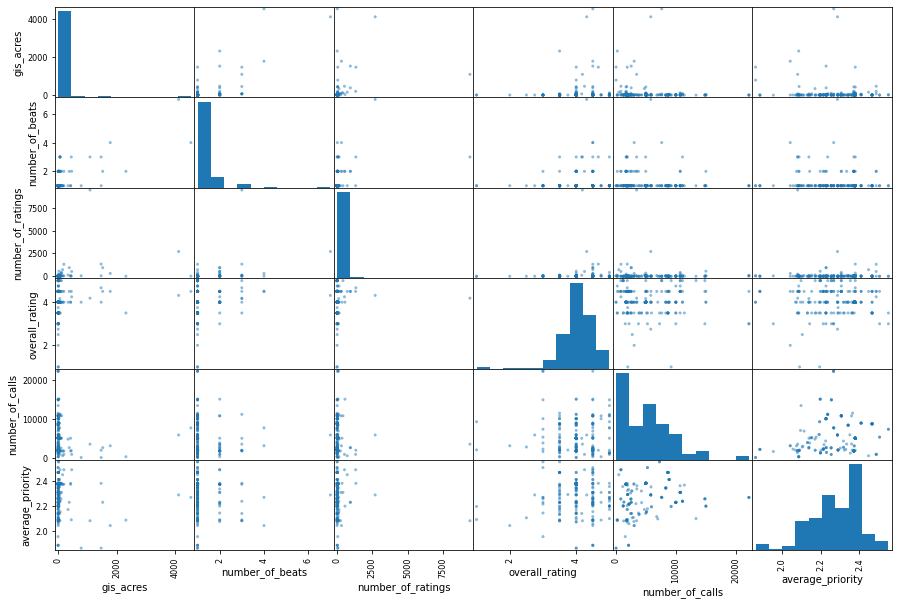

In [50]:
pd.plotting.scatter_matrix(df_final[['gis_acres', 'number_of_beats','number_of_ratings','overall_rating','number_of_calls','average_priority']], 
                           figsize=(15, 10));

My thought would be the more ratings for a park, the more people that live in that area, thus more police being called just because it is a larger population, but when looking at these plots it seems that is not even the case. Instead let's try to run some regressions.

### 5. Regressions and Predictions

In [51]:
outcome, predictors = patsy.dmatrices('overall_rating ~ number_of_calls', df_final)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

In [52]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1784
Date:                Mon, 14 Dec 2020   Prob (F-statistic):              0.673
Time:                        18:55:03   Log-Likelihood:                -187.87
No. Observations:                 210   AIC:                             379.7
Df Residuals:                     208   BIC:                             386.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.0620      0.067     

With a p value of 0.673 we can clearly tell this is no correlation between the number of calls to the police in the area around a park and the rating of that park. Here we see we have failed to reject the null hypothesis. Here is the line of best fit over the last graphic:

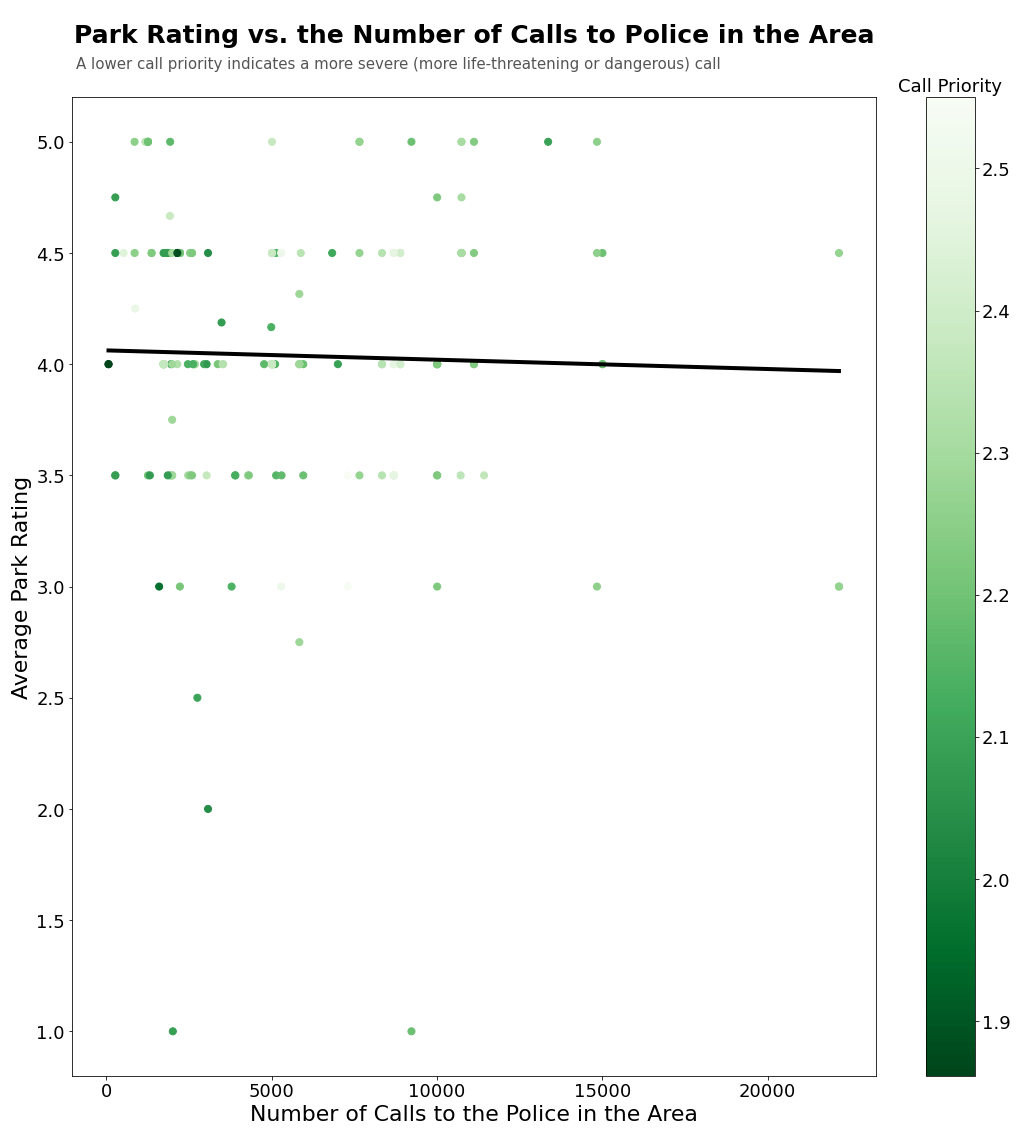

In [53]:
#s = [n for n in range(len(df_2["average_priority"]))]
fig = plt.figure(figsize=(18,18))
sc = plt.scatter(df_final['number_of_calls'], df_final['overall_rating'], c=df_final["average_priority"], s=50, cmap='Greens_r')

plt.colorbar(sc)
plt.title("Park Rating vs. the Number of Calls to Police in the Area", fontsize=25, weight='bold', y=1.05)
plt.xlabel("Number of Calls to the Police in the Area", fontsize=22)
plt.ylabel("Average Park Rating", fontsize=22)
plt.tick_params(labelsize=18)

cb_ax = fig.axes[1] 
cb_ax.set_title('Call Priority', fontdict={'fontsize': 18})
cb_ax.tick_params(labelsize=18)

plt.annotate("A lower call priority indicates a more severe (more life-threatening or dangerous) call",xy=(0.075, .95),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=15, color='#555555')

xs = np.arange(df_final['number_of_calls'].min(), df_final['number_of_calls'].max())
ys = -4.19e-06 * xs + 4.0620
plt.plot(xs, ys, 'k', linewidth=4, label='Model')

It shows you could possibly predict the rating of a park given the number of calls to police near that park as it has a negative slope, but the slope is almost 0 and we know from the p value there is no real correlation and we have failed to reject the null hypothesis. Let's also check to make sure there really is no relationship between park rating and the severity of the calls near the park. *RECALL: low priority means a call is more severe*.

In [54]:
outcome_2, predictors_2 = patsy.dmatrices('overall_rating ~ average_priority', df_final)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

In [55]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.03896
Date:                Mon, 14 Dec 2020   Prob (F-statistic):              0.844
Time:                        18:55:04   Log-Likelihood:                -187.94
No. Observations:                 210   AIC:                             379.9
Df Residuals:                     208   BIC:                             386.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.9001      0.708  

The p value is even larger here so there is also not a relationship here. Finally, I had a thought that my method of determining calls near each park was flawed in that large parks intersected with more neighborhoods and thus were associated with more calls to police then smaller parks. To see if there was any merit to this thought I kept in the "gis_acres" column of the park data frame which gives how big each park is in acreage, and can use it to see if there is any correlation between park size and number of calls to police in and around that park:

In [56]:
outcome_3, predictors_3 = patsy.dmatrices('number_of_calls ~ gis_acres', df_final)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()

In [57]:
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:        number_of_calls   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.433
Date:                Mon, 14 Dec 2020   Prob (F-statistic):              0.233
Time:                        18:55:04   Log-Likelihood:                -2046.1
No. Observations:                 210   AIC:                             4096.
Df Residuals:                     208   BIC:                             4103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5412.6321    294.309     18.391      0.0

Although there does seem to be more of a relationship than with the other variables the p value is still quite high so no conclusion can really be made about the relationship and we fail to reject the null hypothesis here as well.

# Ethics & Privacy

My data should not violate any privacy concerns amongst the general public. The ratings data is from yelp, a public ratings system, which means this is data the users had put out into the public realm for others to see anyway. Professor Ellis had curated the yelp ratings data and the source I used simply had the name of each park and then that park's overall rating. In other words, this means I never worked with individual user ratings and never handled any private information that may come with that. The data about all the calls to the San Diego Police in the year 2020 could be seen as possibly concerning, but the data includes no names of people involved and really only includes the main street name and police beat number. The data also does not include the name of police officers involved, or any names at all. The only defining characteristics of each call in the data is the beat number and the main street name both of which generalize to very large areas and thus don't violate anyone's privacy. Same goes for the data showing which police beat numbers corresponds to which neighborhood, and the geodata for each neighborhood. These are very general areas aren't specific enough to violate anyone’s privacy.  

The data could reflect a bias in reference to the question. It is possible that larger parks (parks that cover more area) will intersect with more neighborhoods and have larger amounts of people using them since they are bigger and take up more space. If the larger parks support larger populations of people, then it is not out of the question to assume that there will be more crime in areas with larger amounts of people statistically because it is a larger population. 

Another possible bias is the general bias that comes with ratings of anything. It’s possible that park goer's ratings could be biased as many people could enjoy the park everyday but never write a review, but the few people who have a bad experience are very likely to write a review and voice their frustration.

I handled the first bias at the end of my Data Analysis when I checked if there was any correlation between park size (in acres) and the number of calls to police around a park. I determined there was no correlation. The second bias is much harder to handle and the most I can do is mention it here, so that it is at least acknowledged.




# Conclusion & Discussion

For this project I sought to answer the question: is there any relationship between park ratings and the level of crime in and around that park. Police beat numbers refer to the territory that police officer patrols. By figuring out the beat number for every San Diego neighborhood, I could then find which neighborhood each San Diego park intersects with. From here I could associate each San Diego park with one or more police beat number. After that I found out the yelp rating for each park in San Diego and merged the ratings into my overall data frame using location data of the yelp ratings. Thanks to my visualizations and regressions I have determined there is no relationship between park rating and crime activity in and around a park (number of calls to the police near the park). I had hypothesized that a lower park rating would predict more crime in the area but clearly from the results I have failed to reject the null hypothesis and have determined there is no correlation. 

I ran into multiple limitations in this project. The largest one being police call priority. Although I was examining the relationship between park ratings and number of calls to the police near that park, I also wanted to examine the average priority of the calls made to police near that park. I thought by taking a look at the severity of the calls to police (on average) we could maybe get a better sense of how dangerous the area around a given park is. Although this data also showed no correlation to park rating there were some problems in how to interpret it. On the San Diego Data website, the source of the dataset holding police call priority, there is an attached PDF claiming that police call priority ranges from E, 1, 2, 3, 4, with E being the most urgent call and 4 being the least urgent call. Yet the data in the csv file for call priority contained the unique values of 0, 1, 2, 3, 4, 5, 6, 8, 9. There was no clarification as to why this was, so based on the information in the attached PDF I interpreted the police call priorities as a lower priority means a more dangerous/life threatening call. Even if my assumption had been wrong, it would not have changed the fact that there is no relationship between police call priority and park rating. 

Another large limitation was, although my method of matching police beats to parks by finding which neighborhoods each park intersects with was effective, it may not be the best way to approach this. If you look at the maps in my data analysis the grey background outlining the city of San Diego is divided by each neighborhood in San Diego. There are a couple examples of neighborhoods that are much larger than others. A large park could intersect multiple large neighborhoods and be associated with more than one police beat. These police beats are then representing larger neighborhoods and thus are more likely to have more calls. At the very end of my data analysis, I checked on this theory and determined there was also no relationship between park size and number of calls to the police, which bodes well that my methods were solid and are accurately showing us that there is no relationship between park rating and number of calls to the police in and near a park. I still believe it would've been more accurate to have the crime data in a radius around each park area if that data had been available. 

The hope of this project was to show that lower rated parks would predict areas with higher crime rates in an effort to convince legislators and the Parks and Recreation Department to invest more in these parks to raise them to the standards of highly rated parks as to try and help prevent crime in that area. Although no relation was found in this project there is room to do redo the analysis better and show that it is necessary.
